In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [ ]:
# mount to google drive to access csv located in my google drive
drive.mount('/content/drive/')
#os.getcwd()
os.chdir('drive/MyDrive/GradSchool/CHEM_269/Act2')

Mounted at /content/drive/


In [ ]:
# Load the data and preview it
df = pd.read_excel('Guess_Who_Features.xlsx')
df.set_index('Feature', inplace=True)
df.head()
#df.shape #68 rows (features), 65 columns(people)

Adrian_Jinich Nate_Roethler Rocky  Nate Julia Derek Ariel  \
Feature                                                                        
wears glasses                  1             0     0   NaN     0     0     0   
runs for exercise              0             0     1   NaN     1     0     0   
number of siblings             1             2     1   NaN     2     2     2   
likes ice cream                1             1     1   NaN     1     0     1   
brown eyes                     1             1     1   NaN     1     1     1   

                   Sierra Christie Karry  ... Shirley Megha Felipe Aaryan  \
Feature                                   ...                               
wears glasses           0        0     1  ...       1     0      1      1   
runs for exercise       1        1     0  ...       0     1      0      0   
number of siblings      5        3     0  ...       1     1      2      1   
likes ice cream         1        1     1  ...       1     1      1      1   
brown eyes              0        1     0  ...       1     1      1      1   

                   Mayuna Joshua R Thompson Miranda Diana Caxton  
Feature                                                           
wears glasses         1.0        1        1       1     0      0  
runs for exercise     1.0        1        0       0     1      0  
number of siblings    NaN        9        2       1     4      0  
likes ice cream       NaN        1        1       1     1      1  
brown eyes            NaN        0        1       1     1      0  

[5 rows x 65 columns]

In [ ]:
#before transposing, want to remove columns missing any values
df = df.dropna(axis=1, how='any')
#taking original dataframe, transpose by making the names the first column and the features into the row headers aka each feature is a column
df_transposed = df.transpose()
df_transposed.shape # 60 people, 68 feature cols


(60, 68)

In [ ]:
print(df_transposed.loc['Clare','brown eyes'])

1


In [ ]:
#pandas assigned every value as datatype 'object', meaning it imported everything as a string
#change all non-categorical columns to be stored as int64 (a number)
df_T_numerical = df_transposed.apply(pd.to_numeric, errors='ignore')
df_T_numerical.dtypes #output now shows that everything but the strings are stored as numbers

<ipython-input-55-b14c5ed74862>:3: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



Feature
wears glasses                      int64
runs for exercise                  int64
number of siblings                 int64
likes ice cream                    int64
brown eyes                         int64
                                   ...  
wants to work in industry         object
number of types of pets owned?     int64
tolerance to sweetness (1-5)       int64
favorite video game console       object
are you nice?                     object
Length: 68, dtype: object

In [ ]:
#find binary columns

binary_cols = df_T_numerical.columns[
    (df_T_numerical.nunique() == 2)
    & df_T_numerical.isin([0, 1]).all()]
#keep only binary columns - this will be dataframe to use for the game
df_binary = df_T_numerical[binary_cols]
df_binary.head() #now only have 55 columns because only binary were kept

#print(df_binary.loc[0,:])

Feature        wears glasses  runs for exercise  likes ice cream  brown eyes  \
Adrian_Jinich              1                  0                1           1   
Nate_Roethler              0                  0                1           1   
Rocky                      0                  1                1           1   
Julia                      0                  1                1           1   
Derek                      0                  0                0           1   

Feature        undergraduate student  graduate student  less than 6'  \
Adrian_Jinich                      0                 0             0   
Nate_Roethler                      0                 1             0   
Rocky                              0                 1             1   
Julia                              1                 0             1   
Derek                              1                 0             1   

Feature        has a mac laptop  introvert  can catch very well?  ...  \
Adrian_Jinich                 0          1                     1  ...   
Nate_Roethler                 1          0                     1  ...   
Rocky                         0          0                     1  ...   
Julia                         1          1                     1  ...   
Derek                         1          0                     0  ...   

Feature        enjoys spicy food  plays guitar  plays piano  wine expert  \
Adrian_Jinich                  1             1            1            0   
Nate_Roethler                  1             0            0            0   
Rocky                          1             0            0            0   
Julia                          1             1            1            0   
Derek                          1             0            0            0   

Feature        certified phlebotomist  straight hair  international?  \
Adrian_Jinich                       0              1               1   
Nate_Roethler                       0              1               0   
Rocky                               0              0               0   
Julia                               0              1               0   
Derek                               0              0               0   

Feature        is left handed?  has never dyed hair  has been in the military  
Adrian_Jinich                0                    1                         0  
Nate_Roethler                1                    0                         0  
Rocky                        0                    0                         0  
Julia                        0                    1                         0  
Derek                        0                    1                         0  

[5 rows x 55 columns]

In [ ]:
#make the target and the features variables

#target = y
y = df_binary.loc[:,'undergraduate student']

#target = x
X = df_binary.drop(columns=['undergraduate student'])

# [EXERCISE 1] First Classification Task - Guess Who
### I will use either df_binary


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt # For confusion matrix visualization
import seaborn as sns # For confusion matrix visualization


In [ ]:

# create the training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # how much does changing test_size and randome_state effect the model?

#check their shape

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape) #it makes sense that y has no columns because its just a vector
print("y_test shape:", y_test.shape)

X_train shape: (48, 54)
X_test shape: (12, 54)
y_train shape: (48,)
y_test shape: (12,)


In [ ]:
#Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# --- Option 1: Logistic Regression ---
model_lr = LogisticRegression(max_iter=1000) # Increase max_iter if needed
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# --- Option 2: Decision Tree ---
model_dt = DecisionTreeClassifier(random_state=42)  # Add random_state for reproducibility
model_dt.fit(X_train_scaled, y_train) # Can also use unscaled data for decision trees


DecisionTreeClassifier(random_state=42)

In [ ]:
# --- Option 3: Random Forest ---
model_rf = RandomForestClassifier(random_state=42)  # Add random_state for reproducibility
model_rf.fit(X_train_scaled, y_train) # Can also use unscaled data for random forests

RandomForestClassifier(random_state=42)

In [ ]:
#predictions with linear regression
predictions_lr = model_lr.predict(X_test_scaled)

#predictions with decision tree
predictions_dt = model_dt.predict(X_test_scaled)

#predictions with random forest
predictions_rf = model_rf.predict(X_test_scaled)


## Evaluating the LR model

In [ ]:
# --- Calculate Metrics for LR model ---
accuracy = accuracy_score(y_test, predictions_lr)
precision = precision_score(y_test, predictions_lr)
recall = recall_score(y_test, predictions_lr)
f1 = f1_score(y_test, predictions_lr)


# Recall measures how many of the actual positive instances were correctly identified by the model.
# Recall = True Positives / (True Positives + False Negatives)


# F1 score: the harmonic mean of precision and recall.
# F1-score = 2 * (Precision * Recall) / (Precision + Recall)



# --- Display Metrics ---
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8333333333333334
Precision: 0.75
Recall: 0.75
F1-score: 0.75


In [ ]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, predictions_lr)


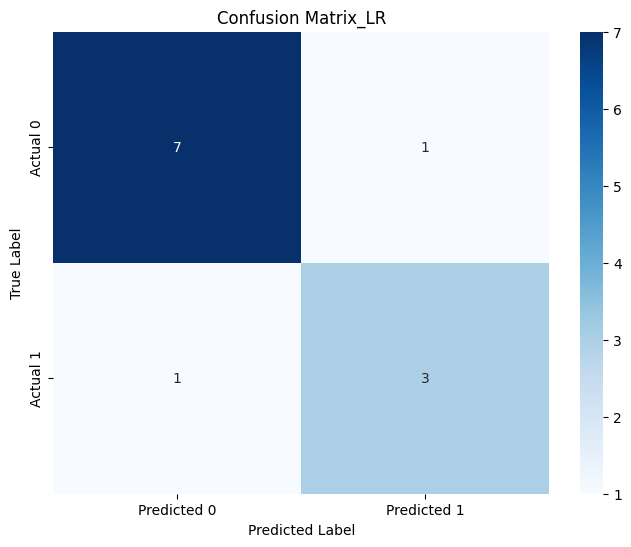

In [ ]:
# --- Visualize Confusion Matrix (using matplotlib and seaborn) ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix_LR")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#* Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions.
#    - True Positives (Top Left): Correctly predicted "has glasses"
#    - True Negatives (Bottom Right): Correctly predicted "does not have glasses"
#    - False Positives (Top Right): Predicted "has glasses" but they don't
#    - False Negatives (Bottom Left): Predicted "does not have glasses" but they do

## Evaluating the decision tree model

In [ ]:
# --- Calculate Metrics for LR model ---
accuracy = accuracy_score(y_test, predictions_dt)
precision = precision_score(y_test, predictions_dt)
recall = recall_score(y_test, predictions_dt)
f1 = f1_score(y_test, predictions_dt)

# --- Display Metrics ---
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, predictions_dt)

Accuracy: 0.8333333333333334
Precision: 0.75
Recall: 0.75
F1-score: 0.75


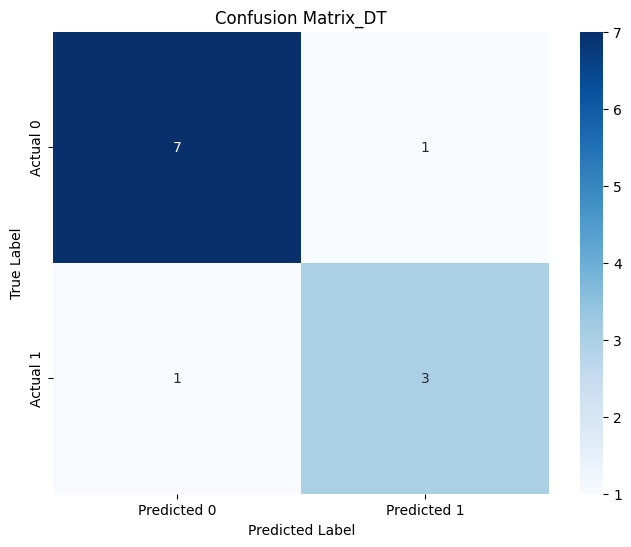

In [ ]:
# --- Visualize Confusion Matrix (using matplotlib and seaborn) ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix_DT")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#* Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions.
#    - True Positives (Top Left): Correctly predicted "has glasses"
#    - True Negatives (Bottom Right): Correctly predicted "does not have glasses"
#    - False Positives (Top Right): Predicted "has glasses" but they don't
#    - False Negatives (Bottom Left): Predicted "does not have glasses" but they do

## Evaluating the RF model

In [ ]:
# --- Calculate Metrics for LR model ---
accuracy = accuracy_score(y_test, predictions_rf)
precision = precision_score(y_test, predictions_rf)
recall = recall_score(y_test, predictions_rf)
f1 = f1_score(y_test, predictions_rf)

# --- Display Metrics ---
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, predictions_rf)

Accuracy: 0.9166666666666666
Precision: 0.8
Recall: 1.0
F1-score: 0.8888888888888888


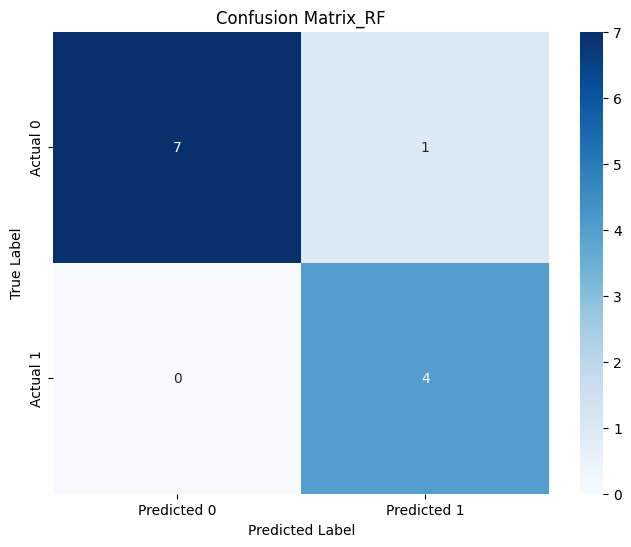

In [ ]:
# --- Visualize Confusion Matrix (using matplotlib and seaborn) ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix_RF")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#* Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions.
#    - True Positives (Top Left): Correctly predicted "has glasses"
#    - True Negatives (Bottom Right): Correctly predicted "does not have glasses"
#    - False Positives (Top Right): Predicted "has glasses" but they don't
#    - False Negatives (Bottom Left): Predicted "does not have glasses" but they do

## [EXERCISE 2] perform cross validation of model - 5-fold cross validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
#make the target and the features variables the same as before

#target = y
y = df_binary.loc[:,'undergraduate student']

#target = x
X = df_binary.drop(columns=['undergraduate student'])

In [ ]:
# 3. Scale Data (Important!) - Fit on each fold's training data separately
scaler = StandardScaler()

# 4. Set up K-fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle is usually a good idea

# 5. Train and Evaluate using Cross-Validation
model = LogisticRegression(max_iter=1000)  # Your model

In [ ]:
# --- Option 1: Using cross_val_score (more concise) ---
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Use appropriate scoring metric

print("Cross-validation scores (using cross_val_score):", scores)
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation score:", scores.std())


Cross-validation scores (using cross_val_score): [0.91666667 0.91666667 0.75       1.         0.83333333]
Mean cross-validation score: 0.8833333333333332
Standard deviation of cross-validation score: 0.08498365855987973


In [ ]:
# --- Option 2: Manual loop (more control, allows for per-fold analysis) ---
fold_num = 1
all_scores = []
for train_index, val_index in kf.split(X, y): # Note the split is on X and y, not just X
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Scale the data for this fold
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)  # Use the same scaler fitted on the training data

    # Train the model on this fold
    model.fit(X_train_scaled, y_train)

    # Evaluate the model on this fold
    score = model.score(X_val_scaled, y_val) # Or use other metrics like accuracy_score, etc.
    all_scores.append(score)

    print(f"Fold {fold_num}: Validation score = {score}")
    fold_num += 1

print("Mean cross-validation score (manual loop):", np.mean(all_scores))
print("Standard deviation of cross-validation score (manual loop):", np.std(all_scores))


Fold 1: Validation score = 0.8333333333333334
Fold 2: Validation score = 0.9166666666666666
Fold 3: Validation score = 0.75
Fold 4: Validation score = 0.9166666666666666
Fold 5: Validation score = 0.8333333333333334
Mean cross-validation score (manual loop): 0.85
Standard deviation of cross-validation score (manual loop): 0.06236095644623234


In [ ]:
X_scaled = scaler.fit_transform(X) # Scale the entire dataset
model.fit(X_scaled, y) # Fit the final model

LogisticRegression(max_iter=1000)

In [ ]:
# --- Calculate Metrics for LR model ---
accuracy = accuracy_score(y_test, predictions_dt)
precision = precision_score(y_test, predictions_dt)
recall = recall_score(y_test, predictions_dt)
f1 = f1_score(y_test, predictions_dt)

# --- Display Metrics ---
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, predictions_dt)

Accuracy: 0.8333333333333334
Precision: 0.75
Recall: 0.75
F1-score: 0.75


In [ ]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)

# Store metrics for each fold
all_accuracy = []
all_precision = []
all_recall = []
all_f1 = []

fold_num = 1
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled) # Make predictions on the validation set

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    all_accuracy.append(accuracy)
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)

    print(f"Fold {fold_num}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}")
    fold_num += 1

# Calculate and print the mean and standard deviation of the metrics
print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(all_accuracy)} +/- {np.std(all_accuracy)}")
print(f"Mean Precision: {np.mean(all_precision)} +/- {np.std(all_precision)}")
print(f"Mean Recall: {np.mean(all_recall)} +/- {np.std(all_recall)}")
print(f"Mean F1-score: {np.mean(all_f1)} +/- {np.std(all_f1)}")


Fold 1:
  Accuracy: 0.8333333333333334
  Precision: 0.75
  Recall: 0.75
  F1-score: 0.75
Fold 2:
  Accuracy: 0.9166666666666666
  Precision: 0.875
  Recall: 1.0
  F1-score: 0.9333333333333333
Fold 3:
  Accuracy: 0.75
  Precision: 0.75
  Recall: 0.6
  F1-score: 0.6666666666666666
Fold 4:
  Accuracy: 0.9166666666666666
  Precision: 0.75
  Recall: 1.0
  F1-score: 0.8571428571428571
Fold 5:
  Accuracy: 0.8333333333333334
  Precision: 0.8333333333333334
  Recall: 0.8333333333333334
  F1-score: 0.8333333333333334

--- Summary ---
Mean Accuracy: 0.85 +/- 0.06236095644623234
Mean Precision: 0.7916666666666667 +/- 0.052704627669472995
Mean Recall: 0.8366666666666667 +/- 0.15289793254906286
Mean F1-score: 0.8080952380952381 +/- 0.09176525310815929


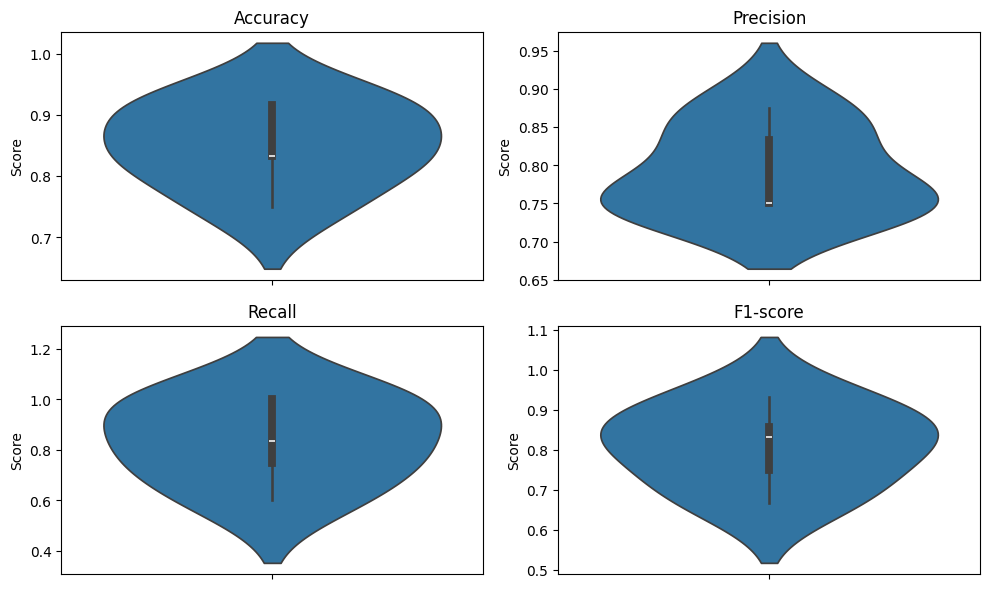

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
all_metrics = [all_accuracy, all_precision, all_recall, all_f1]  # List of your metric lists

plt.figure(figsize=(10, 6))

for i, metric_values in enumerate(all_metrics):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(y=metric_values) # Create violin plot
    plt.title(metrics[i])
    plt.ylabel("Score")

plt.tight_layout()
plt.show()

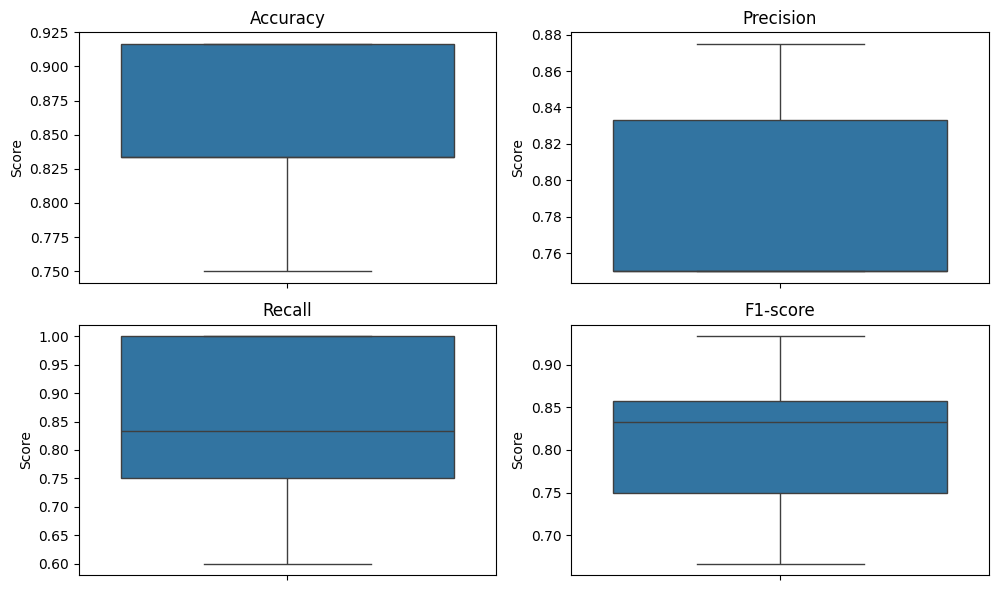

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for i, metric_values in enumerate(all_metrics):
    plt.subplot(2, 2, i + 1)  # Create subplots (2 rows, 2 columns)
    sns.boxplot(y=metric_values)  # Create box plot
    plt.title(metrics[i])  # Set title
    plt.ylabel("Score")

plt.tight_layout() # Adjust subplot params so that subplots fit in to the figure area.
plt.show()

# Conclusions:
#### Overall, I noticed that the feature I tried to predict made a bigger difference on the performance of the model than the type of model used. For example, I first tried to predict 'wears glasses' and got F1 scores in the neighborhood of 0.5 or so. When I changed the predicted feature to 'undergraduate student', the performance was much better according to the metrics evaluated. What I take from this is that the quality of the training dataset is the biggest factor for how the model will perform.

# [EXERCISE 3] steroid dataset


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt # For confusion matrix visualization
import seaborn as sns # For confusion matrix visualization

In [ ]:
# import steroid data

df_pos = pd.read_excel('steroids_positive_entries_020825.xlsx')
df_neg = pd.read_excel('steroids_negative_entries_020825.xlsx')


In [ ]:
#check shape of positive and negative entries
df_pos.shape , df_neg.shape

((5598, 10), (22151, 10))

In [ ]:
# check what information is in the dataframes
df_pos.iloc[1,:]
df_neg.iloc[1,:]

Entry                                                   A0A0A7HFE6
Entry Name                                             CSM6B_STRTR
Protein names    CRISPR system endoribonuclease Csm6' (EC 3.1.-...
Gene Names                                                   csm6'
Organism                                Streptococcus thermophilus
Length                                                         386
Sequence         MRVLISAVGDTDPFRNFHDGSLIHIARKYRPEKVILIFSEHTAKKQ...
Annotation                                                       4
Rhea ID                                                        NaN
SMILES                                                         NaN
Name: 1, dtype: object

In [ ]:
# add a column to each dataframe that indicates whether or not it's steroid interacting
# so that when we merge them we will have that indentifier
df_pos['steroid_interacting'] = True
df_neg['steroid_interacting'] = False

In [ ]:
# concatenate the positive and negative dataframes
df_both = pd.concat([df_pos, df_neg], axis = 0)

print(df_both.shape) # should be the sum of both row amounts for df_pos and df_neg
df_both.head()

(27749, 11)


Entry        Entry Name  \
0  A0A016VA76  A0A016VA76_9BILA   
1  A0A023EUU2  A0A023EUU2_AEDAL   
2  A0A023EUU7  A0A023EUU7_AEDAL   
3  A0A023FCJ4  A0A023FCJ4_TRIIF   
4  A0A026WVM4  A0A026WVM4_OOCBI   

                                       Protein names  \
0  Sterol carrier protein 2 (EC 2.3.1.155) (EC 2....   
1  Sterol carrier protein 2 (EC 2.3.1.155) (EC 2....   
2  Sterol carrier protein 2 (EC 2.3.1.155) (EC 2....   
3  Sterol carrier protein 2 (EC 2.3.1.155) (EC 2....   
4  Sterol carrier protein 2 (EC 2.3.1.155) (EC 2....   

                                    Gene Names  \
0  Acey_s0014.g2217 Acey-daf-22 Y032_0014g2217   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                   X777_13892   

                                            Organism  Length  \
0                             Ancylostoma ceylanicum     531   
1  Aedes albopictus (Asian tiger mosquito) (Stego...     544   
2  Aedes albopictus (Asian tiger mosquito) (Stego...     544   
3                  Triatoma infestans (Assassin bug)     540   
4  Ooceraea biroi (Clonal raider ant) (Cerapachys...     541   

                                            Sequence  Annotation Rhea ID  \
0  MTKPKVFVIGVGMTKFCKPGSRDWDYPDMVKEAVTTALDDCKLKYS...           5   62960   
1  MGVPKVYVVGVGMTKFEKPGRRENFDYPQMAKEAVTKALNDARIQY...           5   62960   
2  MGVPKVYVVGVGMTKFEKPGRRENFDYPQMAKEAVTKALNDARIQY...           5   62960   
3  RVKVYVVGVGMTKFYKPGKSDKDYPELAKEAIMKALEDARINHDDV...           5   62960   
4  MVYKPKVYVIGVGMTKFEKPGRRDDFDYPQMAKEAVSKALQDSRIY...           5   62960   

                                              SMILES  steroid_interacting  
0  [H][C@@]1(CC[C@@]2([H])C3=CC=C4C[C@@H](O)CC[C@...                 True  
1  [H][C@@]1(CC[C@@]2([H])C3=CC=C4C[C@@H](O)CC[C@...                 True  
2  [H][C@@]1(CC[C@@]2([H])C3=CC=C4C[C@@H](O)CC[C@...                 True  
3  [H][C@@]1(CC[C@@]2([H])C3=CC=C4C[C@@H](O)CC[C@...                 True  
4  [H][C@@]1(CC[C@@]2([H])C3=CC=C4C[C@@H](O)CC[C@...                 True

In [ ]:
#import embeddings

import h5py

filename_list = ['steroids_positive_entries.h5', 'steroids_negative_entries.h5']

#to create an empty dictionary use curly brackets!!
embeddings = {}

for filename in filename_list:
  with h5py.File(filename, 'r') as f:
    for entry, embedding in f.items():
      embeddings[entry] = np.array(embedding)



In [ ]:
len(embeddings) #this should match the concatenated number of rows

27749

In [ ]:
#make a 2D projection of the data
!pip install -q umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
import umap

In [ ]:
#define identifiers and data
identifiers = list(embeddings.keys())
data_matrix = np.array(list(embeddings.values()))

#fixed to extract
identifiers = sorted(embeddings.keys()
data_matrix = np.array(embeddings[uid] for uid in identifiers))

#umap dimensionality reduction
reducer = umap.UMAP(metric = 'cosine',
                    random_state = 42)

umap_projection = reducer.fit_transform(data_matrix)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
# add umap data to corresponding entries
umap_df = pd.DataFrame(umap_projection, columns = ['umap-1', 'umap-2'])
umap_df['Entry'] = identifiers

In [ ]:
# add umap data to our merged steroid dataframe
df_both = pd.merge(df_both, umap_df, on = 'Entry', how = 'left')

In [ ]:
df_both.tail()

Entry   Entry Name                                      Protein names  \
27744  P33274    CP4F1_RAT  Cytochrome P450 4F1 (CYPIVF1) (Cytochrome P450...   
27745  P13584  CP4B1_HUMAN  Cytochrome P450 4B1 (EC 1.14.14.1) (CYPIVB1) (...   
27746  Q7Z449  CP2U1_HUMAN  Cytochrome P450 2U1 (Long-chain fatty acid ome...   
27747  Q9CX98  CP2U1_MOUSE  Cytochrome P450 2U1 (Long-chain fatty acid ome...   
27748  G3V7X8    CP26B_RAT                Cytochrome P450 26B1 (EC 1.14.13.-)   

                  Gene Names                 Organism  Length  \
27744  Cyp4f1 Cyp4f-1 Cyp4f2  Rattus norvegicus (Rat)     524   
27745                 CYP4B1     Homo sapiens (Human)     511   
27746                 CYP2U1     Homo sapiens (Human)     544   
27747                 Cyp2u1     Mus musculus (Mouse)     530   
27748                Cyp26b1  Rattus norvegicus (Rat)     512   

                                                Sequence  Annotation  \
27744  MSQLSLSWLGLGPEVAFPWQTLLLFGASWILAQILTQIYAAYRNFR...           5   
27745  MVPSFLSLSFSSLGLWASGLILVLGFLKLIHLLLRRQTLAKAMDKF...           5   
27746  MSSPGPSQPPAEDPPWPARLLRAPLGLLRLDPSGGALLLCGLVALL...           5   
27747  MSSLGDQRPAAGEQPGARLHVRATGGALLLCLLAVLLGWVWLRRQR...           5   
27748  MLFEGLELVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...           5   

                                                 Rhea ID SMILES  \
27744  RHEA:39755 RHEA:48656 RHEA:48660 RHEA:22176 RH...    NaN   
27745                                         RHEA:17149    NaN   
27746        RHEA:56748 RHEA:39759 RHEA:39755 RHEA:50296    NaN   
27747        RHEA:56748 RHEA:39759 RHEA:39755 RHEA:50296    NaN   
27748                              RHEA:51984 RHEA:55856    NaN   

       steroid_interacting    umap-1     umap-2  
27744                False -0.067392  -5.619973  
27745                False -0.043073  -5.620041  
27746                False  5.187167  -7.519390  
27747                False  5.183336  -7.513577  
27748                False  6.816501  14.360996

In [ ]:
import plotly.express as px

### Make a 2D interactive plot to explore the interaction between the positive and negative dataframes

In [ ]:
print("Unique values in steroid_interacting:", df_both['steroid_interacting'].unique())

Unique values in steroid_interacting: [ True False]


In [ ]:
fig = px.scatter(
    df_both,
    x = 'umap-1',
    y = 'umap-2',
    color = 'steroid_interacting',
    hover_data = ['Entry', 'Protein names'],
    title = 'UMAP projection of steroid data',
    width = 1200,
    height = 900,
    color_discrete_map = {True: 'blue', False: 'orange'},
    opacity = 0.3 #
    )
fig.show()

### Training different model types on the steroid dataset and cross validate the model

In [ ]:
# extract entry ID's in the same order as df_both
valid_entries = df_both['Entry'].values

In [ ]:
# X will be our protein embeddings as a stacked np array

X_list = [embeddings[entry] for entry in valid_entries]
X = np.vstack(X_list) #vstack vertically stacks the arrays
X.shape

(27749, 1024)

In [ ]:
# Y is the vector of labels specifying if a proteins is or is not steroid interacting.
# X and y are linked because we extracted the embeddings in the same order as in the dataframe

y = df_both['steroid_interacting'].astype(int).values # convert true/false to 0/1
X.shape, y.shape

((27749, 1024), (27749,))

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
# make 5 separate train/test splits for cross-validation

kf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

In [ ]:
#make an empty list to store results
crossval_results = []

In [ ]:
# define the models we will train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric = 'logloss'),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [ ]:

# train all models on the steroid dataset and print out their performance
for name, model in models.items():
  print(name)
  accuracies, precisions, recalls, f1_scores, roc_scores = [], [], [], [], []
# the kf is where we specify 5-fold cross validation as defined above
  for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_scores.append(roc_auc_score(y_test, y_pred))

  crossval_results.append({
      'Model': name,
      'Accuracy': np.mean(accuracies),
      'Precision': np.mean(precisions),
      'Recall': np.mean(recalls),
      'F1 Score': np.mean(f1_scores),
      'ROC AUC Score': np.mean(roc_scores)
}
)
df_crossval_results = pd.DataFrame(crossval_results)
df_crossval_results


Logistic Regression
XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[20:35:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[20:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[20:37:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[20:37:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[20:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Random Forest


Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0  Logistic Regression  0.975314   0.948055  0.928547  0.938187       0.957840
1              XGBoost  0.988180   0.984027  0.956949  0.970288       0.976511
2        Random Forest  0.983459   0.993468  0.924080  0.957496       0.961273

### Interpretation of above results:
#### F1 score and ROC AUC scores are best metrics to evaluate model performance.
#### F1 score is the harmonic mean of precision and recall. F1-score = 2 * (Precision * Recall) / (Precision + Recall). This tells us how well the model can truly predict the feature we identify while minimizing false positives.
#### ROC AUC score - area under the Receiver operating characteristic curve. This is a measure of false positives vs. true positives, where a higher AUC indicates there are very few false positives (x axis) and many true positives (y axis)

In [ ]:
import pickle
import joblib

# [EXERCISE 4] Running the model to discover new steroid-interacting proteins

In [ ]:
# retrain XGBoost (best performing per F1 and ROC AUC scores)
# model on entire dataset

# X is data
# y is predictions

#define best model
best_model_name = df_crossval_results.loc[df_crossval_results['F1 Score'].idxmax()]['Model'] #example using F1 score
print(f"Best model was: {best_model_name}")

#initialize the model and rerun it on full dataset
best_model_name == "XGBoost"
best_model = XGBClassifier()
print(f"Retraining {best_model_name} on the entire dataset")

best_model.fit(X, y)


Best model was: XGBoost
Retraining XGBoost on the entire dataset


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#save model to a pkl file for later use
model_filename = f"{best_model_name}_retrained.pkl"
joblib.dump(best_model, model_filename)
print(f"{best_model_name} model saved to {model_filename}")

XGBoost model saved to XGBoost_retrained.pkl


In [ ]:
# Now I can use my model on my previous organisms: Possum, honeybee, p.cepacia

In [ ]:
import h5py
import gzip
import shutil
import numpy as np
import io

### This is the code I use generally for loading the dataframes and corresponding embeddings.

In [ ]:
# Load the data frame for the organism
df = pd.read_excel('../Act1/Bee.xlsx')


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [ ]:
#Function to load my compressed proteome embedding
def load_compressed_h5_to_dict(file_name):
    with gzip.open(file_name, 'rb') as f:
        with h5py.File(io.BytesIO(f.read()), 'r') as h5f:
            data_dict = {key: np.array(h5f[key]) for key in h5f.keys()}
    return data_dict

In [ ]:
filename_list = ['../Act1/P_cepacia_embedding.gz',
                 '../Act1/Possum_embeddings.gz',
                 '../Act1/Bee_embeddings.gz']



In [ ]:
# Load the protein embeddings
file_name = "../Act1/Bee_embeddings.gz"
#load embeddings into dictionary
embeddings = load_compressed_h5_to_dict(file_name)
print(f"Loaded {len(embeddings)} proteins.")

Loaded 19019 proteins.


In [ ]:
#define identifiers and data
identifiers = list(embeddings.keys())
data_matrix = np.array(list(embeddings.values()))

#umap dimensionality reduction
reducer = umap.UMAP(metric = 'cosine',
                    random_state = 42)

umap_projection = reducer.fit_transform(data_matrix)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:

# Identify entries not in combined_proteomes if relevant
missing_entries = []
for entry in df['Entry']:
    if entry not in embeddings:
        missing_entries.append(entry)

print("Entries not found in proteomes:", missing_entries)

# Delete rows with missing entries
df = df[~df['Entry'].isin(missing_entries)]


Entries not found in proteomes: ['A0A7M7KZK9', 'A0A7M7KZP1', 'A0A7M7KZT6', 'A0A7M7L0H9', 'A0A7M7L255', 'A0A7M7L5D4', 'A0A7M7L5T5', 'A0A7M7MK84', 'A0A7M7ML23', 'A0A7M7ML30', 'A0A7M7ML32', 'A0A7M7ML35', 'A0A7M7ML37', 'A0A7M7ML40', 'A0A7M7ML41', 'A0A7M7ML42', 'A0A7M7ML43', 'A0A7M7ML44', 'A0A7M7ML46', 'A0A7M7ML53', 'A0A7M7ML56', 'A0A7M7ML57', 'A0A7M7ML63', 'A0A7M7ML64', 'A0A7M7ML65', 'A0A7M7ML71', 'A0A7M7ML82', 'A0A7M7MVW4', 'A0A7M7MXR6', 'A0A7M7SNR4', 'A0A7M7SP66', 'A0A7M7SP72', 'A0A7M7SS52', 'A0A7M7ML48', 'A0A7M7ML49']


In [ ]:
#make an empty list to hold the vectors and keep track of their orders
vectors = []
entries_in_order = []

for entry in df.loc[:,'Entry']:
    if entry in embeddings: #check to see if entry from df exists in proteome_dict
        vectors.append(embeddings[entry])
        entries_in_order.append(entry) #if so, add it to the ordered list
    else:
      print(f"Warning: Entry {entry} not found in proteome_dict. Skipping.")

vectors = np.array(vectors) #convert to numpy array for UMAP

In [ ]:
#apply UMAP for dimensionality reduction
scaler = StandardScaler()
vectors_scaled = scaler.fit_transform(vectors)
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(vectors_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [ ]:
umap_df = pd.DataFrame(umap_projection, columns = ['umap-1', 'umap-2'])
umap_df['Entry'] = identifiers

In [ ]:
df_embeddings = pd.merge(df, umap_df, on = 'Entry', how = 'left')

In [ ]:
df_embeddings.head()

Entry        Entry Name  \
0  A0A7M7G9W6  A0A7M7G9W6_APIME   
1  A0A7M7GMR8  A0A7M7GMR8_APIME   
2  A0A7M7H069  A0A7M7H069_APIME   
3  A0A7M7H2V0  A0A7M7H2V0_APIME   
4  A0A7M7IIQ1  A0A7M7IIQ1_APIME   

                                       Protein names        Gene Names  \
0  Acylglycerol kinase, mitochondrial (EC 2.7.1.1...  727071 LOC727071   
1                                  O-acyltransferase  552377 LOC552377   
2  Fatty acid synthase (EC 1.1.1.100) (EC 1.3.1.3...  412815 LOC412815   
3  Sterol carrier protein 2 (EC 2.3.1.155) (EC 2....  408904 LOC408904   
4                                  O-acyltransferase  552377 LOC552377   

                    Organism  Length    Mass  \
0  Apis mellifera (Honeybee)     432   49320   
1  Apis mellifera (Honeybee)     446   51888   
2  Apis mellifera (Honeybee)    2388  264436   
3  Apis mellifera (Honeybee)     539   59024   
4  Apis mellifera (Honeybee)     444   52352   

                                            Sequence  \
0  MAKILNFFRTIRNNWKKSLIGGAALTYGISYSKEIYDTDQLMRQYC...   
1  MEHENDTRVRLRRTKSETRAEEIQKAEQMVRKSQPDKPCHRPRDSL...   
2  MPAQFESANTPVVGEPTMMNGDTTPYNINDEIVISGFSGRYPESSN...   
3  MSPRMKIYVIGVGMTKFEKPGKRENFDYPDMAKEAVTKALQDAKIS...   
4  MEHENDTRVRLRRTKSETRAEEIQKAEQMVRKSQPDKPCHRPRDSL...   

                                       Function [CC]  Annotation  umap-1  \
0                                                NaN         5.0     NaN   
1                                                NaN         5.0     NaN   
2  FUNCTION: Fatty acid synthetase is a multifunc...         5.0     NaN   
3  FUNCTION: Mediates the transfer of all common ...         5.0     NaN   
4                                                NaN         5.0     NaN   

   umap-2  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [ ]:
# extract entry ID's in the same order as df_both
valid_entries = df_embeddings['Entry'].values

In [ ]:
# X will be our protein embeddings as a stacked np array

X_list = [embeddings[entry] for entry in valid_entries]
X = np.vstack(X_list) #vstack vertically stacks the arrays
X.shape

(19019, 1024)

In [ ]:
model_filename = "XGBoost_retrained.pkl"  # Or the filename of your saved model
loaded_model = joblib.load(model_filename)

In [ ]:
# Run the model on the organism!!
predictions = loaded_model.predict(X)

In [ ]:
# calculate prediction score
try:
    probabilities = loaded_model.predict_proba(X)
    prediction_scores = probabilities[:, 1]  # Probability of class 1 (steroid-interacting)
except AttributeError:
    print("Model does not support predict_proba(). Using decision function instead.")
    prediction_scores = loaded_model.decision_function(X) #If probabilities are not available, use the decision function

#add the predictions and their scores to the main dataframe
df_embeddings['predictions'] = predictions #will be a 1 or 0
df_embeddings['prediction_scores'] = prediction_scores #probability its correct

In [ ]:
df_embeddings.head()

Entry        Entry Name  \
0  A0A7M7G9W6  A0A7M7G9W6_APIME   
1  A0A7M7GMR8  A0A7M7GMR8_APIME   
2  A0A7M7H069  A0A7M7H069_APIME   
3  A0A7M7H2V0  A0A7M7H2V0_APIME   
4  A0A7M7IIQ1  A0A7M7IIQ1_APIME   

                                       Protein names        Gene Names  \
0  Acylglycerol kinase, mitochondrial (EC 2.7.1.1...  727071 LOC727071   
1                                  O-acyltransferase  552377 LOC552377   
2  Fatty acid synthase (EC 1.1.1.100) (EC 1.3.1.3...  412815 LOC412815   
3  Sterol carrier protein 2 (EC 2.3.1.155) (EC 2....  408904 LOC408904   
4                                  O-acyltransferase  552377 LOC552377   

                    Organism  Length    Mass  \
0  Apis mellifera (Honeybee)     432   49320   
1  Apis mellifera (Honeybee)     446   51888   
2  Apis mellifera (Honeybee)    2388  264436   
3  Apis mellifera (Honeybee)     539   59024   
4  Apis mellifera (Honeybee)     444   52352   

                                            Sequence  \
0  MAKILNFFRTIRNNWKKSLIGGAALTYGISYSKEIYDTDQLMRQYC...   
1  MEHENDTRVRLRRTKSETRAEEIQKAEQMVRKSQPDKPCHRPRDSL...   
2  MPAQFESANTPVVGEPTMMNGDTTPYNINDEIVISGFSGRYPESSN...   
3  MSPRMKIYVIGVGMTKFEKPGKRENFDYPDMAKEAVTKALQDAKIS...   
4  MEHENDTRVRLRRTKSETRAEEIQKAEQMVRKSQPDKPCHRPRDSL...   

                                       Function [CC]  Annotation  umap-1  \
0                                                NaN         5.0     NaN   
1                                                NaN         5.0     NaN   
2  FUNCTION: Fatty acid synthetase is a multifunc...         5.0     NaN   
3  FUNCTION: Mediates the transfer of all common ...         5.0     NaN   
4                                                NaN         5.0     NaN   

   umap-2  predictions  prediction_scores  
0     NaN            0           0.014260  
1     NaN            0           0.056430  
2     NaN            0           0.002086  
3     NaN            1           0.999934  
4     NaN            0           0.065356

In [ ]:
# find out how many proteins are predicted to interact with steroids for my organism
steroid_interacting_proteins = df_embeddings[df_embeddings['predictions'] == 1]
print(f"Number of proteins predicted to interact with steroids: {len(steroid_interacting_proteins)}")


Number of proteins predicted to interact with steroids: 112


In [ ]:
# write the results (only steroid interacting proteins) to a CSV file
output_file = "predicted_steroid_interactions_bee.csv"
steroid_interacting_proteins.to_csv(output_file, index=False)
print(f"Predictions saved to {output_file}")


Predictions saved to predicted_steroid_interactions_bee.csv
